In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor ,GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [67]:
os.chdir('C:/Users/lenovo/Desktop/Omkar/Hackathon/Updated Hackathon')

In [68]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [199]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df.drop(['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)
df_test.drop(['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)
df['cc_cons_avg'] = (df['cc_cons_apr'] + df['cc_cons_may'] + df['cc_cons_jun'])/3
df_test['cc_cons_avg'] = (df_test['cc_cons_apr'] + df_test['cc_cons_may'] + df_test['cc_cons_jun'])/3
df.set_index('ID',inplace= True)
df_test.set_index('ID',inplace= True)
df = treat_outliers(df)
df_test = treat_outliers(df_test)
outliers_df =detect_outliers(df)
outliers_test = detect_outliers(df_test)
for col in df.select_dtypes(include ='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.transform(df_test[col])

In [200]:
df.isnull().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
c

In [23]:
df_test.isnull().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
c

In [71]:
df.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,0,1,35,708,24893.00,378.00,10288.00,16077.96,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1631.11,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,172336.00,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0,17157.466667
17645,0,1,35,249,18941.62,966.00,20672.00,411.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,35.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0,14610.206667
7604,0,1,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,85.0,4.0,1.0,79.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,2.0,27036.0,19817.94,16095.0,10533.206667
1590,0,0,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,2.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,154070.50,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0,20206.793333
16556,0,1,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,50.0,16.0,68.0,297000.0,568.80,385000.00,126001.0,6916.0,17022.81,58897.03,46.0,35.0,19613.0,136301.61,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0,4642.133333


In [201]:
outliers_df[outliers_df['Number of Outliers'] > 0]

,Feature,Number of Outliers
15,investment_1,2123
17,investment_3,1554
26,credit_count_may,2655
31,credit_count_jun,2217
35,cc_cons,3134


In [202]:
outliers_test[outliers_test['Number of Outliers'] > 0]

,Feature,Number of Outliers
15,investment_1,662
17,investment_3,519
26,credit_count_may,953
31,credit_count_jun,740


In [203]:
df.skew()

account_type             1.943852
gender                  -2.111613
age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             1.758273
investment_2             0.903871
investment_3             1.403952
investment_4             0.006199
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         1.482276
debit_count_ma

In [205]:
df_copy =df.copy()
df_test_copy = df_test.copy()

In [206]:
df_copy['investment_1'] =  np.log(df_copy['investment_1'] )
df_copy['investment_3'] = np.sqrt(df_copy['investment_3'])
df_copy['credit_count_may'] = np.log(df_copy['credit_count_may'])
df_copy['credit_count_jun'] = np.sqrt(df_copy['credit_count_jun'])
#df_copy['cc_cons'] = np.(df_copy['cc_cons'])

In [207]:
df_test_copy['investment_1'] =  np.log(df_test_copy['investment_1'] )
df_test_copy['investment_3'] = np.sqrt(df_test_copy['investment_3'])
df_test_copy['credit_count_may'] = np.log(df_test_copy['credit_count_may'])
df_test_copy['credit_count_jun'] = np.sqrt(df_test_copy['credit_count_jun'])
#df_test_copy['cc_cons'] = np.(df_test_copy['cc_cons'])

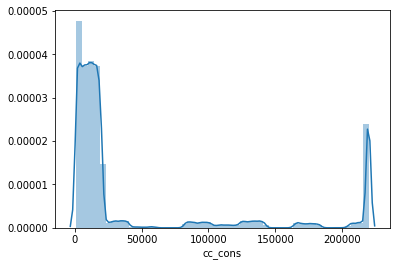

In [208]:
sns.distplot(df_copy['cc_cons'])

In [32]:
detect_outliers(df_test_copy)

,Feature,Number of Outliers
0,account_type,801
1,gender,657
2,age,0
3,region_code,0
4,cc_cons_apr,0
5,dc_cons_apr,0
6,cc_cons_may,0
7,dc_cons_may,0
8,cc_cons_jun,0
9,dc_cons_jun,0


In [194]:
#df_copy.drop(['account_type','gender'],axis =1,inplace = True)

In [195]:
#df_test_copy.drop(['account_type','gender'],axis =1,inplace = True)

In [211]:
lower_bound =0.05
upper_bound =0.78
res = df_copy['cc_cons'].quantile([lower_bound,upper_bound])
res

0.05     1291.00
0.78    33561.02
Name: cc_cons, dtype: float64

In [212]:
true_index = (res.loc[lower_bound] < df_copy.cc_cons.values) & (df_copy.cc_cons.values < res.loc[upper_bound])
true_index
false_index =~true_index

In [213]:
#df_copy.cc_cons[true_index]

df_copy.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,0,1,35,708,24893.00,378.00,10288.00,16077.96,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,6.385532,1631.11,28.053520,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,172336.00,0.693147,40.0,24563.0,30051.32,12761.0,1.414214,65.0,50836.0,1674.09,20014.0,17157.466667
17645,0,1,35,249,18941.62,966.00,20672.00,411.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,12.271660,172678.56,300.873728,1500.0,12255.75,88693.37,35.0,35.0,80750.0,92276.57,71162.00,0.693147,78.0,23948.0,42119.05,76206.0,4.582576,63.0,23226.0,13043.34,10173.0,14610.206667
7604,0,1,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,85.0,4.0,1.0,79.0,199999.0,12.019186,470000.00,159.762323,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,0.693147,82.0,10752.0,58373.25,75283.0,2.645751,2.0,27036.0,19817.94,16095.0,10533.206667
1590,0,0,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,2.0,50.0,1.0,1.0,10.0,155000.0,11.312920,223379.40,220.227155,-4679.0,11558.23,154070.50,43.0,30.0,52732.0,43867.91,63033.84,3.135494,38.0,12607.0,69851.51,68708.0,4.582576,83.0,43037.0,3544.33,7707.0,20206.793333
16556,0,1,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,50.0,16.0,68.0,297000.0,6.343529,385000.00,354.966196,6916.0,17022.81,58897.03,46.0,35.0,19613.0,136301.61,30286.00,3.178054,50.0,25213.0,10071.00,80140.0,2.828427,32.0,32044.0,12780.44,96408.0,4642.133333


In [214]:
for i in df_copy.cc_cons[false_index].index:
    df_copy.cc_cons.loc[i] = df_copy.cc_cons_avg[i]

In [215]:
df_copy.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'cc_cons_avg'],
      dtype='object')

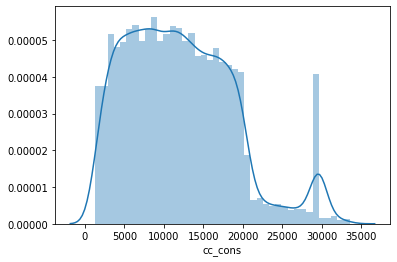

In [216]:
sns.distplot(df_copy.cc_cons)

In [94]:
detect_outliers(df_copy)

,Feature,Number of Outliers
0,account_type,2273
1,gender,2055
2,age,0
3,region_code,0
4,cc_cons_apr,0
5,dc_cons_apr,0
6,cc_cons_may,0
7,dc_cons_may,0
8,cc_cons_jun,0
9,dc_cons_jun,0


In [50]:
#df_copy['cc_cons'] =  np.power(df_copy['cc_cons'],3)

In [217]:
X=df_copy.drop('cc_cons',axis=1)
y=df_copy.cc_cons
target_col ='cc_cons'

In [219]:
# scalar =MinMaxScaler()
# X_scaled = scalar.fit_transform(X)
# y_scaled = scalar.fit_transform(y.values.reshape(-1,1))
# x_train,x_test,y_train,y_test= train_test_split(X_scaled,y_scaled,test_size = 0.3, random_state = 6)
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.3, random_state = 6)

In [220]:
 from sklearn.pipeline import Pipeline

In [221]:
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()
feature_scaler.fit(train_x)
target_scaler.fit(train_y.values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [222]:
train_x_scaled =feature_scaler.transform(train_x)
test_x_scaled = feature_scaler.transform(test_x)
train_y_scaled = target_scaler.transform(train_y.values.reshape(-1,1))
test_y_scaled = target_scaler.transform(test_y.values.reshape(-1,1))

In [192]:
train_x_scaled = pd.DataFrame(train_x_scaled,columns = X.columns,index =train_x.index)
test_x_scaled = pd.DataFrame(test_x_scaled,columns = X.columns,index =test_x.index)
# # y_train = pd.DataFrame(y_train,columns = ['cc_cons'])
# # y_test =  pd.DataFrame(y_test,columns = ['cc_cons'])

In [223]:
df_test_scaled = feature_scaler.transform(df_test_copy)

In [224]:
df_test_scaled = pd.DataFrame(df_test_scaled,columns = df_test.columns,index =df_test.index)

In [225]:
# prepare the model with input scaling
# pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
# # fit pipeline
# pipeline.fit(train_x, train_y)
# # make predictions
# yhat = pipeline.predict(test_x)


In [226]:
df_test_scaled.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons_avg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17591,0.0,1.0,0.250000,0.514196,0.039140,0.050613,0.144598,0.016946,0.317167,0.975626,0.037975,0.098765,0.012195,0.938776,1.000000,0.064103,0.197980,-0.023048,0.780348,0.049166,0.030267,0.168075,0.252903,0.164557,1.000000,0.164003,0.136256,0.214706,0.844957,0.2000,0.042531,0.163867,0.176967,0.051251,0.099010,0.245512,0.049518,0.095689
13541,0.0,1.0,0.138889,0.228707,0.708472,0.069994,0.017783,0.131035,0.385895,0.036659,0.025316,0.098765,0.012195,1.000000,0.860465,0.384615,0.064646,0.754910,0.974721,0.017243,0.993796,0.202382,0.100426,0.493671,0.142857,-0.003446,0.071444,0.747196,1.000000,0.4500,0.117033,0.050192,0.081194,0.166938,0.366337,0.105952,0.828202,0.401685
13431,0.0,1.0,0.694444,0.118297,0.119374,0.321896,0.046887,0.022659,-0.000763,0.242078,0.075949,0.345679,0.024390,0.469388,0.604651,0.012821,0.046463,0.676357,0.974721,0.630102,0.472732,0.432982,0.200310,0.481013,0.171429,0.053011,0.979763,0.206690,0.993744,0.3875,0.317622,0.177740,0.191758,0.132524,0.069307,0.116125,0.123518,-0.010455
8687,0.0,1.0,0.138889,0.190852,0.021796,0.988392,0.956439,0.000000,0.130759,0.984786,0.000000,1.000000,0.829268,0.081633,0.000000,0.128205,0.995960,0.461669,0.974721,0.159297,0.628217,0.256044,0.244953,0.544304,0.028571,0.982644,0.719596,0.253153,0.292091,0.0125,0.951739,0.606657,0.686566,0.510898,-0.009901,0.716792,0.007228,0.390272
14727,0.0,1.0,0.944444,0.403785,0.051052,0.174764,0.059999,0.146089,0.096926,0.305877,0.012658,0.098765,0.536585,0.081633,0.558140,0.000000,0.252525,0.992567,0.002069,1.000000,0.407211,0.028546,0.054713,0.101266,0.028571,0.047714,0.989790,0.119513,1.000000,0.8875,0.230267,0.082982,0.243015,0.166938,0.326733,0.412169,0.133198,-0.010166


In [227]:
train_x_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [228]:
model = LinearRegression()
model.fit(train_x_scaled, train_y_scaled)
yhat = model.predict(test_x_scaled)
yhat_transform = target_scaler.inverse_transform(yhat)

In [229]:
yhat_transform

array([[10675.24403788],
       [10437.11257049],
       [13143.77449865],
       ...,
       [16800.48671031],
       [ 9258.27861561],
       [16386.45817894]])

In [230]:
df_test_scaled

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons_avg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17591,0.0,1.0,0.250000,0.514196,0.039140,0.050613,0.144598,0.016946,0.317167,0.975626,0.037975,0.098765,0.012195,0.938776,1.000000,0.064103,0.197980,-0.023048,0.780348,0.049166,0.030267,0.168075,0.252903,0.164557,1.000000,0.164003,0.136256,0.214706,0.844957,0.2000,0.042531,0.163867,0.176967,0.051251,0.099010,0.245512,0.049518,0.095689
13541,0.0,1.0,0.138889,0.228707,0.708472,0.069994,0.017783,0.131035,0.385895,0.036659,0.025316,0.098765,0.012195,1.000000,0.860465,0.384615,0.064646,0.754910,0.974721,0.017243,0.993796,0.202382,0.100426,0.493671,0.142857,-0.003446,0.071444,0.747196,1.000000,0.4500,0.117033,0.050192,0.081194,0.166938,0.366337,0.105952,0.828202,0.401685
13431,0.0,1.0,0.694444,0.118297,0.119374,0.321896,0.046887,0.022659,-0.000763,0.242078,0.075949,0.345679,0.024390,0.469388,0.604651,0.012821,0.046463,0.676357,0.974721,0.630102,0.472732,0.432982,0.200310,0.481013,0.171429,0.053011,0.979763,0.206690,0.993744,0.3875,0.317622,0.177740,0.191758,0.132524,0.069307,0.116125,0.123518,-0.010455
8687,0.0,1.0,0.138889,0.190852,0.021796,0.988392,0.956439,0.000000,0.130759,0.984786,0.000000,1.000000,0.829268,0.081633,0.000000,0.128205,0.995960,0.461669,0.974721,0.159297,0.628217,0.256044,0.244953,0.544304,0.028571,0.982644,0.719596,0.253153,0.292091,0.0125,0.951739,0.606657,0.686566,0.510898,-0.009901,0.716792,0.007228,0.390272
14727,0.0,1.0,0.944444,0.403785,0.051052,0.174764,0.059999,0.146089,0.096926,0.305877,0.012658,0.098765,0.536585,0.081633,0.558140,0.000000,0.252525,0.992567,0.002069,1.000000,0.407211,0.028546,0.054713,0.101266,0.028571,0.047714,0.989790,0.119513,1.000000,0.8875,0.230267,0.082982,0.243015,0.166938,0.326733,0.412169,0.133198,-0.010166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,0.0,1.0,0.194444,0.432177,0.085575,0.310299,0.140842,0.255251,0.966558,0.096657,0.316456,0.000000,0.012195,0.000000,0.023256,0.320513,1.004040,0.732095,0.974721,0.000000,0.365546,0.270005,0.207323,0.037975,0.400000,0.202882,0.223864,0.236994,0.945270,0.0875,0.281966,0.690349,0.791155,0.510898,0.475248,0.571661,0.391045,0.534238
14224,0.0,1.0,0.694444,0.747634,0.094453,0.134527,0.628851,0.348440,0.007936,0.040068,0.455696,0.666667,0.573171,0.346939,0.000000,0.730769,0.000000,0.992567,0.610843,0.233361,0.993796,-0.009294,0.000041,0.367089,0.742857,0.203895,0.088383,0.477313,0.427905,0.0500,0.033240,0.491052,0.537448,0.900707,0.356436,0.226853,0.176835,0.238421
18740,0.0,1.0,0.944444,0.968454,0.050879,0.138161,0.178470,0.725287,0.125789,0.066205,0.139241,0.925926,0.000000,0.000000,0.023256,0.205128,0.195960,-0.023048,0.412857,0.450575,0.704221,0.628056,0.495988,0.367089,0.400000,0.048704,0.989790,0.378468,0.612194,1.0000,0.311644,0.351144,0.498771,0.000000,0.158416,-0.000203,0.267667,0.052803


In [231]:
print('RMSLE Value is ',rmsle(test_y_scaled, yhat))
print('RMSLE Value is ',rmsle(test_y, yhat_transform))

RMSLE Value is  [0.14781356]
RMSLE Value is  [0.69623375]


In [232]:
df_test_pred = model.predict(df_test_scaled)
df_hat_transform = target_scaler.inverse_transform(df_test_pred)
sample_submission8 =pd.DataFrame(df_hat_transform,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission8.to_csv('submission8.csv')

In [233]:
df_hat_transform

array([[10271.22425026],
       [12584.8584223 ],
       [ 9218.22711361],
       ...,
       [ 9685.34509386],
       [12031.50529863],
       [10994.1962608 ]])

In [103]:
# x_train = pd.DataFrame(x_train,columns = X.columns)
# x_test = pd.DataFrame(x_test,columns = X.columns)
# # y_train = pd.DataFrame(y_train,columns = ['cc_cons'])
# # y_test =  pd.DataFrame(y_test,columns = ['cc_cons'])

In [104]:
sns.distplot(y_train['cc_cons'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [105]:
model = LinearRegression()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
print('RMSLE Value is ',rmsle(y_test, y_scores))

RMSLE Value is  [0.12731676]


In [42]:
df_test_predictions = model.predict(df_test_copy)

In [43]:
sample_submission =pd.DataFrame(df_test_predictions,columns = ['cc_cons'],index= df_test_copy.index)

In [44]:
sample_submission.to_csv('submission2.csv')

`Lasso and Ridge`

In [47]:
#Features  to be selected for Linear Regression are:
list1 =['account_type','gender','age', 'region_code', 'cc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'investment_3', 'investment_4', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'credit_count_may', 'debit_count_may', 'credit_count_jun', 'debit_count_jun', 'emi_active','cc_cons_avg']
#========================================================================================================================
#Features  to be selected for Decision Tree Regressor are:
list2 =['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_jun', 'dc_count_jun', 'card_lim', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active']
#========================================================================================================================
#Features  to be selected for Random Forest are:
list3 =['region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'card_lim', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active']

In [48]:
from sklearn.linear_model import Ridge, Lasso

## training the model
def regularization_ridge(alpha):
    X=df_copy.loc[: ,list1]
    y=df_copy.cc_cons
    x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    ridgeReg = Ridge(alpha=alpha, normalize=True)

    ridgeReg.fit(x_train,y_train)

    yhat_ridge = ridgeReg.predict(x_val)
    
    return yhat_ridge, ridgeReg

In [49]:
alpha_vals = [0.01, 0.05, 0.5, 5 ,10, 15, 25]
predictors = X.columns


for i in alpha_vals:
    X=df_copy.loc[:,list1]
    y=df_copy.cc_cons
    x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    pred_ridge, model_ridge = regularization_ridge(i)
    #coef = pd.Series(model_ridge.coef_,predictors).sort_values()

    #plt.figure(figsize=(10,10))
    #coef.plot(kind='bar', title='alpha {}'.format(i))
    
    print('RMSLE square for alpha value {} is {}'.format(i,rmsle(y_val, pred_ridge)))

RMSLE square for alpha value 0.01 is 0.6999326955233219
RMSLE square for alpha value 0.05 is 0.6999134385230894
RMSLE square for alpha value 0.5 is 0.7021109196276624
RMSLE square for alpha value 5 is 0.7154023810316466
RMSLE square for alpha value 10 is 0.7196719375577462
RMSLE square for alpha value 15 is 0.7215509722296033
RMSLE square for alpha value 25 is 0.7232798579358293


In [50]:
alpha_vals_lasso = [0.01, 0.05, 0.5, 5]

def regularization_Lasso(alpha):
    X = df_copy.loc[:,list1]
    y = df_copy.cc_cons
    x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    lassoReg = Lasso(alpha=alpha, normalize=True)

    lassoReg.fit(x_train,y_train)

    yhat_lasso = lassoReg.predict(x_val)
    
    return yhat_lasso, lassoReg

In [51]:
for i in alpha_vals_lasso:
    
    pred_lasso, model_lasso = regularization_Lasso(i)
    #coef = pd.Series(model_lasso.coef_,predictors).sort_values()

    #plt.figure(figsize=(10,10))
    #coef.plot(kind='bar', title='alpha {}'.format(i))
    
    print('RMSLE for alpha value {} is {}'.format(i,rmsle(y_val, pred_lasso)))

RMSLE for alpha value 0.01 is 0.6999660862058364
RMSLE for alpha value 0.05 is 0.6998511290004752
RMSLE for alpha value 0.5 is 0.6996051653039054
RMSLE for alpha value 5 is 0.7026547772327


In [52]:
lassoReg = Lasso(alpha=0.01, normalize=True)

lassoReg.fit(x_train,y_train)

y_Pred_lasso = lassoReg.predict(df_test_copy.loc[:,list1])
sample_submission5 =pd.DataFrame(y_Pred_lasso,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission5.to_csv('submission5.csv')

In [53]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

y_pred_ridge = ridgeReg.predict(df_test_copy.loc[:,list1])
sample_submission6 =pd.DataFrame(y_pred_ridge,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission6.to_csv('submission6.csv')

In [54]:
X=df_copy.drop('cc_cons',axis=1)
y=df_copy.cc_cons
model = DecisionTreeRegressor(random_state=0)
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(x_train, y_train)
y_scores = model.predict(x_val)
rmsle_value = rmsle(y_val, y_scores)
print('RMSLE Value is ',rmsle_value)


RMSLE Value is  0.9500459580011101


In [55]:
X=df_copy.drop('cc_cons',axis=1)
y=df_copy.cc_cons
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_scores = model.predict(x_val)
print('RMSLE Value is ',rmsle(y_val, y_scores))

RMSLE Value is  0.728237579597844


In [56]:
df_test_random = model.predict(df_test_copy)

In [57]:
sample_submission3 =pd.DataFrame(df_test_random,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission3.to_csv('submission3.csv')

In [58]:
param_grid = {'n_estimators' : [10,20,30],
               'max_depth': [4,6,8],
               'min_samples_split' : [4,6,8]}
clf = RandomForestRegressor(random_state=9)
grid_search = GridSearchCV(clf, param_grid = param_grid,verbose =2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.5s
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.4s
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.4s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   0.7s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   0.7s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   0.7s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=30, total=   1.1s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=30, total=   1.0s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=9,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8], 'min_

In [59]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 30}

In [61]:
model =  grid_search.best_estimator_
y_pred_5 = model.predict(x_val)
rmsle_value = rmsle(y_val, y_pred_5)
print('RMSLE Value is ',rmsle_value)

RMSLE Value is  0.7005991127496506


In [62]:
df_test_grid = model.predict(df_test_copy)
sample_submission4 =pd.DataFrame(df_test_grid,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission4.to_csv('submission4.csv')

In [63]:
X = df_copy.loc[:,list1]
y = df_copy.cc_cons
model = LinearRegression()
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(x_train, y_train)
y_scores = model.predict(x_val)
rmsle_value = rmsle(y_val, y_scores)
print('RMSLE Value is ',rmsle_value)

RMSLE Value is  0.6999986129238187


In [65]:
df_test_rfe_liner = model.predict(df_test_copy.loc[:,list1])
sample_submission7 =pd.DataFrame(df_test_rfe_liner,columns = ['cc_cons'],index= df_test_copy.index)
sample_submission7.to_csv('submission7.csv')